<a href="https://colab.research.google.com/github/Protons83/Scheduling-System/blob/main/AI_Spam_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from wordcloud import WordCloud, STOPWORDS
import seaborn as sns
import pandas as pd
from wordcloud import WordCloud, STOPWORDS

# Load the dataset from Google Drive
df = pd.read_csv('/content/drive/MyDrive/AI spam/dataset/spamham (1).csv')
# Check the first few rows of the dataset
print(df.head())

# Extract features and labels
X = df['Body']
y = df['Category']
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_features=2000)
X_tfidf = vectorizer.fit_transform(X)

# Encode the multi-class labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


                                                Body  Spam(1) or Ham(0)  \
0  Subject: hpl nom for january 9 , 2001\n( see a...                  0   
1  Subject: neon retreat\nho ho ho , we ' re arou...                  0   
2  Subject: photoshop , windows , office . cheap ...                  1   
3  Subject: re : indian springs\nthis deal is to ...                  0   
4  Subject: ehronline web address change\nthis me...                  0   

       Category  
0  work related  
1         other  
2  work related  
3         other  
4         other  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Check the first few rows of the dataset
print(df.head())



                                                Body  Spam(1) or Ham(0)  \
0  Subject: hpl nom for january 9 , 2001\n( see a...                  0   
1  Subject: neon retreat\nho ho ho , we ' re arou...                  0   
2  Subject: photoshop , windows , office . cheap ...                  1   
3  Subject: re : indian springs\nthis deal is to ...                  0   
4  Subject: ehronline web address change\nthis me...                  0   

       Category  
0  work related  
1         other  
2  work related  
3         other  
4         other  


Training set: 3019 samples
Test set: 647 samples
Validation set: 647 samples
Classification Report:
              precision    recall  f1-score   support

   marketing       0.89      0.78      0.83       160
       other       0.85      0.95      0.90       272
      threat       0.79      0.58      0.67        38
work related       0.81      0.80      0.80       177

    accuracy                           0.85       647
   macro avg       0.83      0.78      0.80       647
weighted avg       0.85      0.85      0.84       647

Confusion Matrix:
[[125  15   3  17]
 [  3 259   0  10]
 [  2   8  22   6]
 [ 10  23   3 141]]


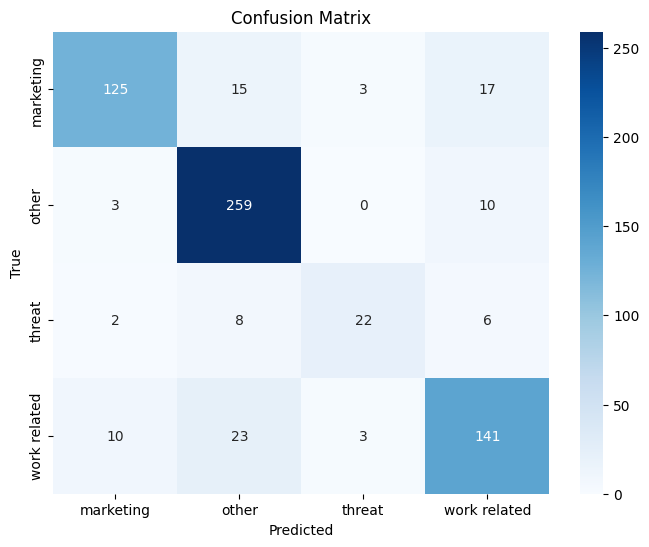

In [ ]:
# Split the data into 70% training and 30% remaining (test + validation)
X_train, X_temp, y_train, y_temp = train_test_split(X_tfidf, y, test_size=0.3, random_state=42)
# Split the remaining 30% into 15% test and 15% validation
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify the sizes of the splits
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")

# Train an SVM model
svm_model = OneVsRestClassifier(SVC(kernel='linear'))
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()